# abc operator

In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from SpectrumCalculator import *

importing Jupyter notebook from SpectrumCalculator.ipynb


In [2]:
N = 100
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
B = (1-x**2)*Id

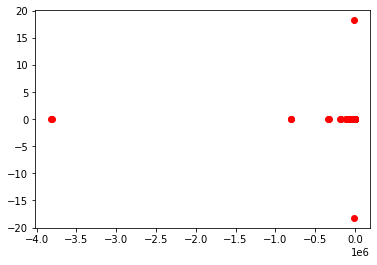

In [4]:
S=SpectrumAlt(L,B);
plt.plot(S.real, S.imag,'ro')
#plt.plot(S[20:N].real, S[20:N].imag,'ro')

In [5]:
##########################################################################################
# Spectral Analysis Tools
##########################################################################################

def Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl) :
    """
    Implement Pseudo-Spectrum of a matrix L
    """
    from scipy import linalg as LA
    
    ### 1. Preparation of tools 
    sizeL = np.shape(L)
    if  np.shape(L)[0]!= np.shape(L)[1]:
        print("Non-square Matrix!!! ")
    else : 
        n = np.shape(L)[0]
    N = n/2 - 1
   
    ### 2. Calculation of the Spectrum (eigenvalues)
    #eigenvalues_L, eigenvectors_L = LA.eig(L,B)
    eigenvalues_L = LA.eigvals(L,B)


    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    
    ### 3. Evaluation of the Pseudospectrum
    
    ### 3.1 Grid for Pseudospectrum calculation
    [X,Y] = np.mgrid[xmin:xmax:Nxgrid*1j,ymin:ymax:Nygrid*1j]

    Z = X + 1j*Y

    ### 3.2 Construction of the "height function" given by the min of the SVP
    Id =  np.eye(n)
    Sigma_min = np.zeros((Nxgrid,Nygrid))
    

    for i in np.arange(0, Nxgrid):
        for j in np.arange(0, Nygrid):
            L_shift = L - Z[i,j]*B*Id            
            Sigma_min[i,j] = min(np.linalg.svd(L_shift, full_matrices=True)[1]) 

    
    ### 3.3 Graphical output
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(eigenvalues_L_Re, eigenvalues_L_Im, '+', markersize=1)
     
    if fl == "f" :
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    elif fl == "c" : 
        CS = ax.contour(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    else :
        print("\n Pseudospectrum output: \n No 'contour/filled' version could be identified.\n Filled version is assumed.\n")
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)

    CB = fig.colorbar(CS)
    ax.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax.set_ylabel(r'$\mathrm{Im}(\omega_n)$')    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig.suptitle(r'Spectrum and Pseudospectrum of $L$' )
    ax.axis('scaled')
    #ax.axis('equal','datalim')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.grid()   
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)

    fig.show()
    print("\n N =\n",N)
    

In [6]:
#xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -20., 500., -200., 200., 75, 75
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -200., 10., -40., 40., 75, 75
heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
#heights = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
fl = "f"


/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'linewidth'
/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



 N =
 49.5


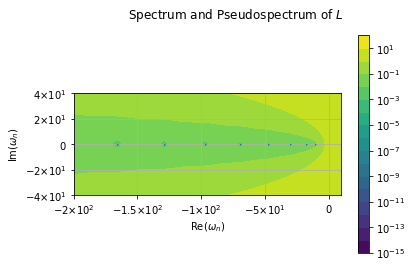

In [7]:
Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl)

In [38]:
np.arange(0, 3)

np.arange(1, int(np.floor(7/2)))
np.zeros(int(np.floor(7/2)-1))
CL_grid(4)[0]
np.kron(1, 0)

0

In [217]:
#def alpha(N):
#    n = N+1
#    n_grid = np.arange(0, n)
#    alpha = np.ones(n)
#    alpha[0]=2
#    alpha[N]=2
#    return alpha

In [222]:
#def CNmuMatrix(mu,N) :
#    n = N+1
#    n_grid = np.arange(0, n)
#    x_grid = CL_grid(N)
#    Nhalffloor_grid = np.arange(1, int(np.floor(N/2)))
#    CNmuMatrix=np.zeros((n,n))
#    if (len(mu)!= n) :
#         return   print(" Lenght of the discretised weight function mu does not coincide with the grid size")
#    else :
#        for i in n_grid :
#            for j in n_grid :
#                if (i==j) :  
#                    CNmuMatrix[i,j] = (2*mu[i]/(alpha(N)[i]*N))*(1-sum([Chebyshev(2*k,x_grid[i])*((2-np.kron(2*k,N))/(4*k**2-1)) for k  in Nhalffloor_grid]) )
#            else :               
#                    CNmuMatrix[i,j] = 0
#              
#    return CNmuMatrix

In [223]:
def CNmuMatrix(mu) :
    """ 
    Reads an ndarray with the values of the weight function mu at the Chebyshev-Lobatto
    collocation points and returns the matrix C^N_mu
    (following equation C14 in Jaramillo-PanossoMacedo-Al-Sheikh paper)
    """
    n = len(mu)
    N = n-1
    n_grid = np.arange(0, n)
    x_grid = CL_grid(N)
    alpha = np.ones(n)
    alpha[0]=2
    alpha[N]=2
    Nhalffloor_grid = np.arange(1, int(np.floor(N/2)))
    CNmuMatrix=np.zeros((n,n))
    for i in n_grid :
        for j in n_grid :
            if (i==j) :  
                CNmuMatrix[i,j] = (2*mu[i]/(alpha[i]*N))*(1-sum([(Chebyshev(2*k,x_grid[i]))*((2-np.kron(2*k,N))/(4*k**2-1)) for k  in Nhalffloor_grid]))
        else :               
                CNmuMatrix[i,j] = 0
              
    return CNmuMatrix

In [224]:
#Diagonal_Random_Matrix(4)
#Diagonal_Random_Matrix(4).np.adjoint
#Diagonal_Random_Matrix(4).np.getH()
#
#x = np.matrix(np.arange(12).reshape((3,4)))
#
#z = x - 1j*x; z
#
#z.getH()
#z

In [225]:
def GramMatrix_abc(w):
    GramMatrix=CNmuMatrix(w)
    return GramMatrix

def ConjugateTranspose(A):
    return A.getH()

def Dagger(GramMatrix,M):
    temp=np.matmul(ConjugateTranspose(M),GramMatrix)
    return np.matmul(np.linalg.inv(GramMatrix),temp)
    

In [226]:
# Sanity check?

In [236]:
mutest =  np.ones(4) #CL_grid(3)
#len(mutest)
mutest

array([1., 1., 1., 1.])

In [238]:
CNmuMatrix(mutest)
#This should be the identity, isn't it?

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [232]:
# Interpolation matrix
CL_grid(3)

array([ 1. ,  0.5, -0.5, -1. ])